In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('encuestas.csv')

In [3]:
df.columns

Index(['instr', 'class', 'nb.repeat', 'attendance', 'difficulty', 'Q1', 'Q2',
       'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13',
       'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23',
       'Q24', 'Q25', 'Q26', 'Q27', 'Q28'],
      dtype='object')

In [4]:
columnas = ['instr', 'Q13',
       'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23',
       'Q24', 'Q25', 'Q26', 'Q27', 'Q28']

In [5]:
df_super = df[columnas]

In [6]:
df_super

,instr,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5816,3,5,5,5,5,5,5,5,5,5,5,4,5,5,5,5,5
5817,3,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
5818,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


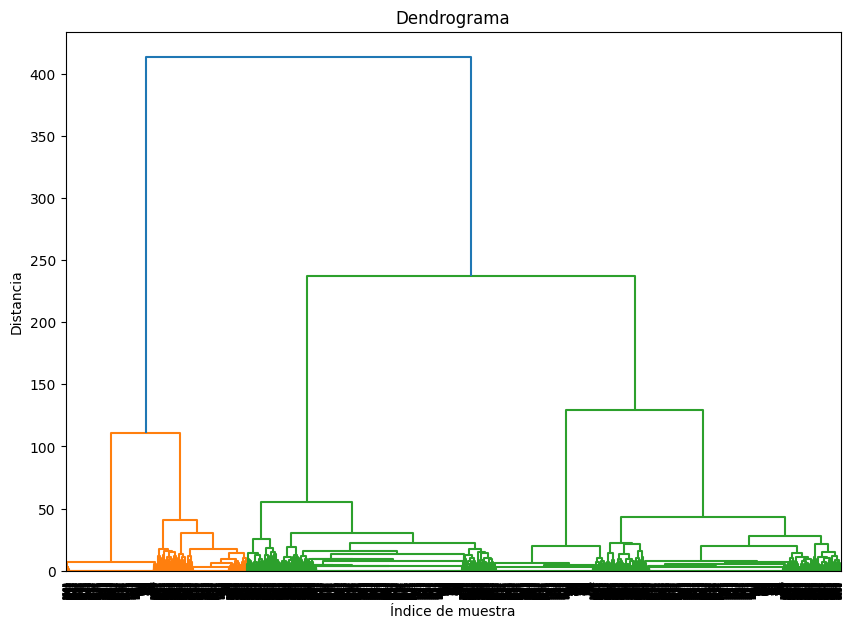

In [7]:
# aplicamos un dendograma que permite conocer las relaciones entre las variables que queremos clusterizar
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage


# Calcular la matriz de linkage
Z = linkage(df_super.iloc[:,1:], method='ward')

# Crear y mostrar el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrograma')
plt.xlabel('Índice de muestra')
plt.ylabel('Distancia')
plt.show()

In [8]:
df_super_aux = df_super

   instr  Q13  Q14  Q15  Q16  Q17  Q18  Q19  Q20  Q21  Q22  Q23  Q24  Q25  \
0      1    3    3    3    3    3    3    3    3    3    3    3    3    3   
1      1    3    3    3    3    3    3    3    3    3    3    3    3    3   
2      1    5    5    5    5    5    5    5    5    5    5    5    5    5   
3      1    3    3    3    3    3    3    3    3    3    3    3    3    3   
4      1    1    1    1    1    1    1    1    1    1    1    1    1    1   

   Q26  Q27  Q28  Cluster  
0    3    3    3        2  
1    3    3    3        2  
2    5    5    5        0  
3    3    3    3        2  
4    1    1    1        1  


/tmp/ipykernel_127619/1804242765.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_super_aux['Cluster'] = clusters


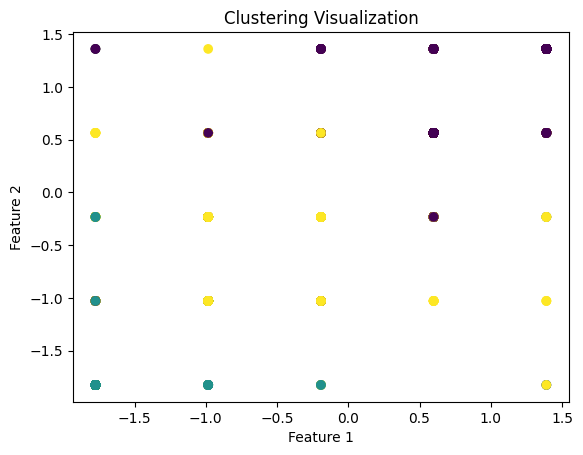

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Selecciona las columnas para el clustering
data = df_super_aux[df_super_aux.columns[1:]]

# Normaliza los datos
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)

# Aplica K-Means
kmeans = KMeans(n_clusters=3, random_state=42)  # Ajusta el número de clústeres según sea necesario
clusters = kmeans.fit_predict(data_normalized)

# Agrega la columna de clústeres al DataFrame original
df_super_aux['Cluster'] = clusters

# Muestra el resultado
print(df_super_aux.head())

# Opcional: Visualización (si es posible en 2D o 3D)
plt.scatter(data_normalized[:, 0], data_normalized[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustering Visualization')
plt.show()


In [10]:
inertia = kmeans.inertia_
print("Inercia (WCSS):", inertia)

Inercia (WCSS): 21745.744728101774


In [11]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(data, kmeans.labels_)
print("Coeficiente de Silueta:", silhouette_avg)


Coeficiente de Silueta: 0.527284108348031


In [12]:
df_super

,instr,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Cluster
0,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2
1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2
2,1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,0
3,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5816,3,5,5,5,5,5,5,5,5,5,5,4,5,5,5,5,5,0
5817,3,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,0
5818,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [13]:
import warnings

In [14]:
df_super.columns[1:-1]

Index(['Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22',
       'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28'],
      dtype='object')

IndexError: index 3 is out of bounds for axis 0 with size 3

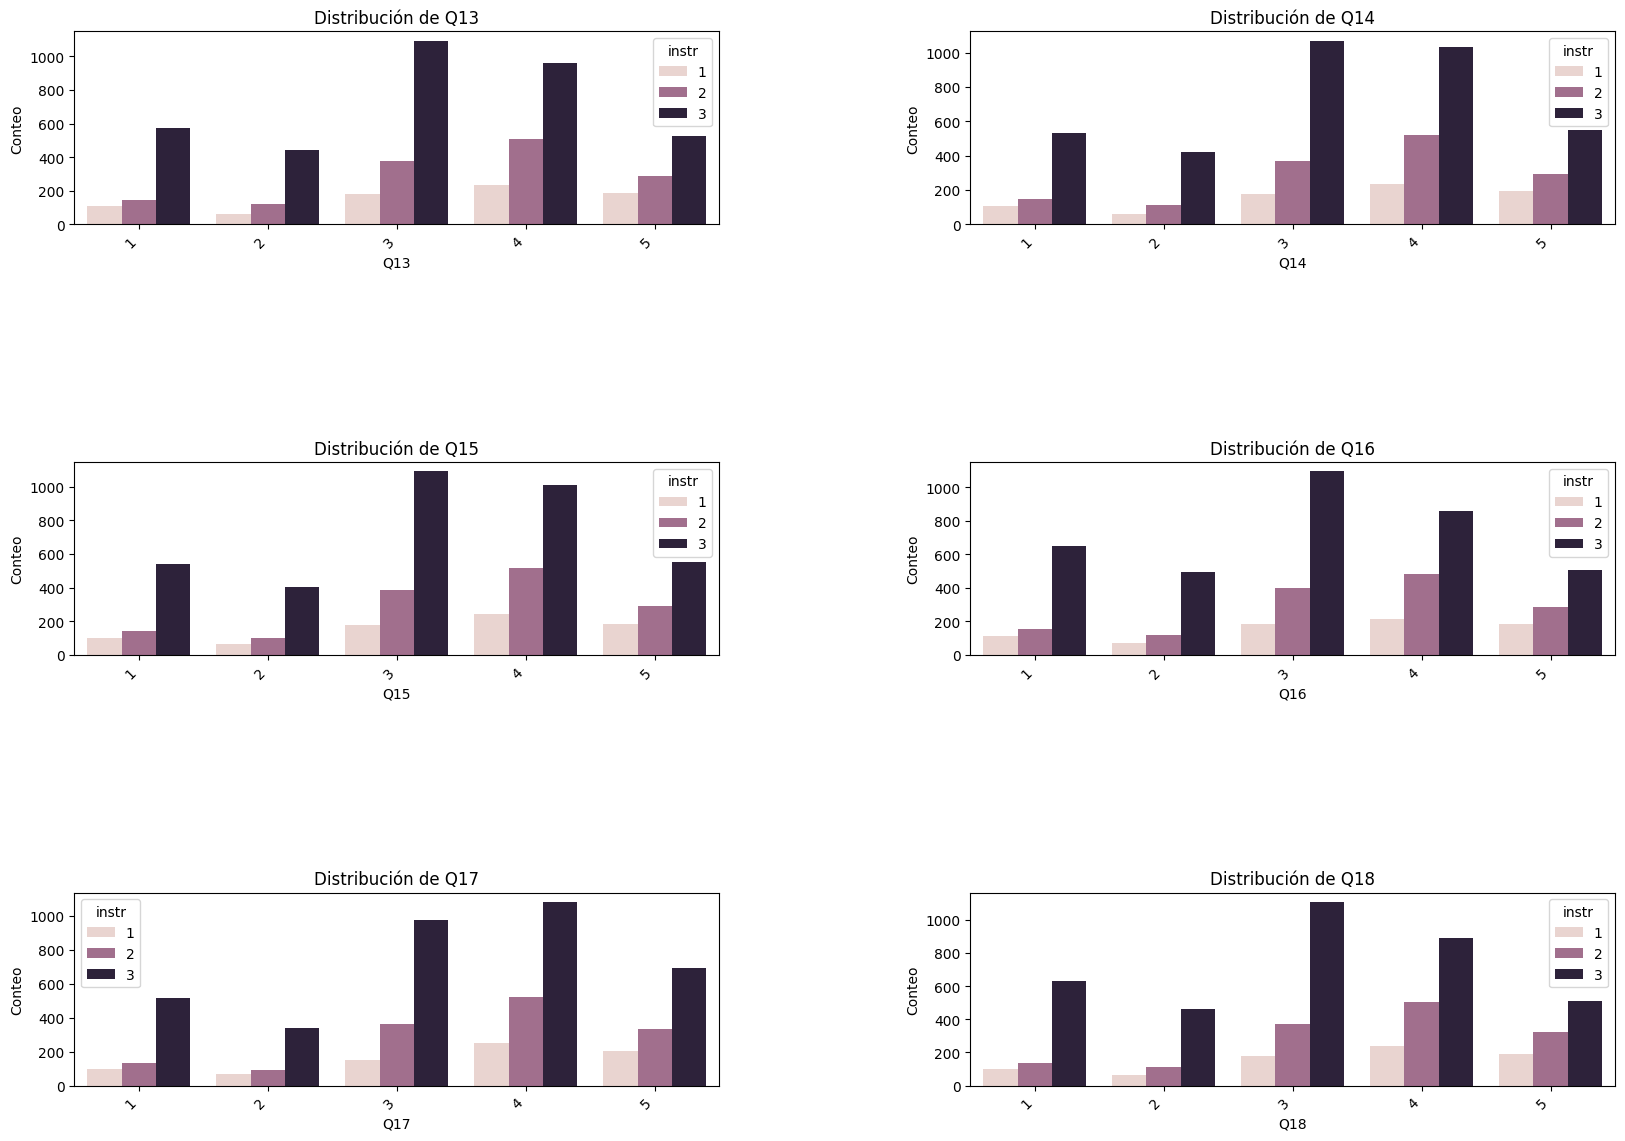

In [15]:
# Suprimir todos los warnings
warnings.filterwarnings("ignore")

# Configuración de la figura y la cuadrícula de subgráficas
fig, axes = plt.subplots(3, 2, figsize=(20, 15))  # Ajusta el tamaño según sea necesario
fig.tight_layout(pad=15.0)  # Ajusta el espaciado entre subgráficas

for i, var in enumerate(df_super.columns[1:-1]):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    if var in df.columns:
        sns.countplot(x=var, hue=df_super['instr'], data=df, ax=ax)
        ax.set_title(f"Distribución de {var}")
        ax.set_ylabel("Conteo")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.show()


In [ ]:
df_super_aux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   instr    5820 non-null   int64
 1   Q13      5820 non-null   int64
 2   Q14      5820 non-null   int64
 3   Q15      5820 non-null   int64
 4   Q16      5820 non-null   int64
 5   Q17      5820 non-null   int64
 6   Q18      5820 non-null   int64
 7   Q19      5820 non-null   int64
 8   Q20      5820 non-null   int64
 9   Q21      5820 non-null   int64
 10  Q22      5820 non-null   int64
 11  Q23      5820 non-null   int64
 12  Q24      5820 non-null   int64
 13  Q25      5820 non-null   int64
 14  Q26      5820 non-null   int64
 15  Q27      5820 non-null   int64
 16  Q28      5820 non-null   int64
 17  Cluster  5820 non-null   int32
dtypes: int32(1), int64(17)
memory usage: 795.8 KB


In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

In [ ]:
df_super_aux['Cluster'].unique()

array([2, 1, 0])

In [ ]:
cm = confusion_matrix(df_super_aux['instr'], df_super_aux['Cluster'])

In [ ]:
cm_df = pd.DataFrame(cm, index=[f'Instructor {i}' for i in range(len(cm))], 
                     columns=[f'Prediccion {i}' for i in range(len(cm[0]))])


In [ ]:
print(cm_df)


              Prediccion 0  Prediccion 1  Prediccion 2  Prediccion 3
Instructor 0             0             0             0             0
Instructor 1           150           395           230             0
Instructor 2           217           761           466             0
Instructor 3           832          1340          1429             0


In [ ]:
df_super_aux.to_excel('df_super.xlsx')

In [ ]:
df = pd.read_csv('turkiye-student-evaluation_generic.csv')

In [ ]:
df.loc[:,'Q13':'Q28'].corr()

,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
Q13,1.000000,0.935892,0.911332,0.895858,0.840693,0.890268,0.882982,0.880842,0.872650,0.867404,0.872573,0.855763,0.867371,0.855618,0.826879,0.855105
Q14,0.935892,1.000000,0.929818,0.888821,0.876135,0.894998,0.890565,0.895837,0.886756,0.886897,0.874134,0.855911,0.890835,0.863121,0.825664,0.868156
Q15,0.911332,0.929818,1.000000,0.894843,0.879264,0.889927,0.888218,0.889175,0.886022,0.887481,0.875622,0.854493,0.886061,0.861506,0.821760,0.865047
Q16,0.895858,0.888821,0.894843,1.000000,0.802596,0.909753,0.881118,0.866393,0.852203,0.849080,0.889466,0.881254,0.853153,0.860446,0.845358,0.832746
Q17,0.840693,0.876135,0.879264,0.802596,1.000000,0.845704,0.862591,0.869337,0.869451,0.874888,0.816596,0.788361,0.874025,0.817704,0.766645,0.856770
Q18,0.890268,0.894998,0.889927,0.909753,0.845704,1.000000,0.904496,0.881115,0.873145,0.874138,0.883972,0.872558,0.861272,0.855463,0.833772,0.843775
Q19,0.882982,0.890565,0.888218,0.881118,0.862591,0.904496,1.000000,0.911703,0.897596,0.892604,0.889861,0.869429,0.878977,0.867957,0.840367,0.864018
Q20,0.880842,0.895837,0.889175,0.866393,0.869337,0.881115,0.911703,1.000000,0.927675,0.912638,0.892795,0.863808,0.893836,0.868952,0.832817,0.884905
Q21,0.872650,0.886756,0.886022,0.852203,0.869451,0.873145,0.897596,0.927675,1.000000,0.941408,0.891903,0.861022,0.904486,0.867752,0.836925,0.888167
Q22,0.867404,0.886897,0.887481,0.849080,0.874888,0.874138,0.892604,0.912638,0.941408,1.000000,0.900714,0.866384,0.913781,0.870339,0.836404,0.894154


In [ ]:
df.corr().to_excel('tes.xlsx')

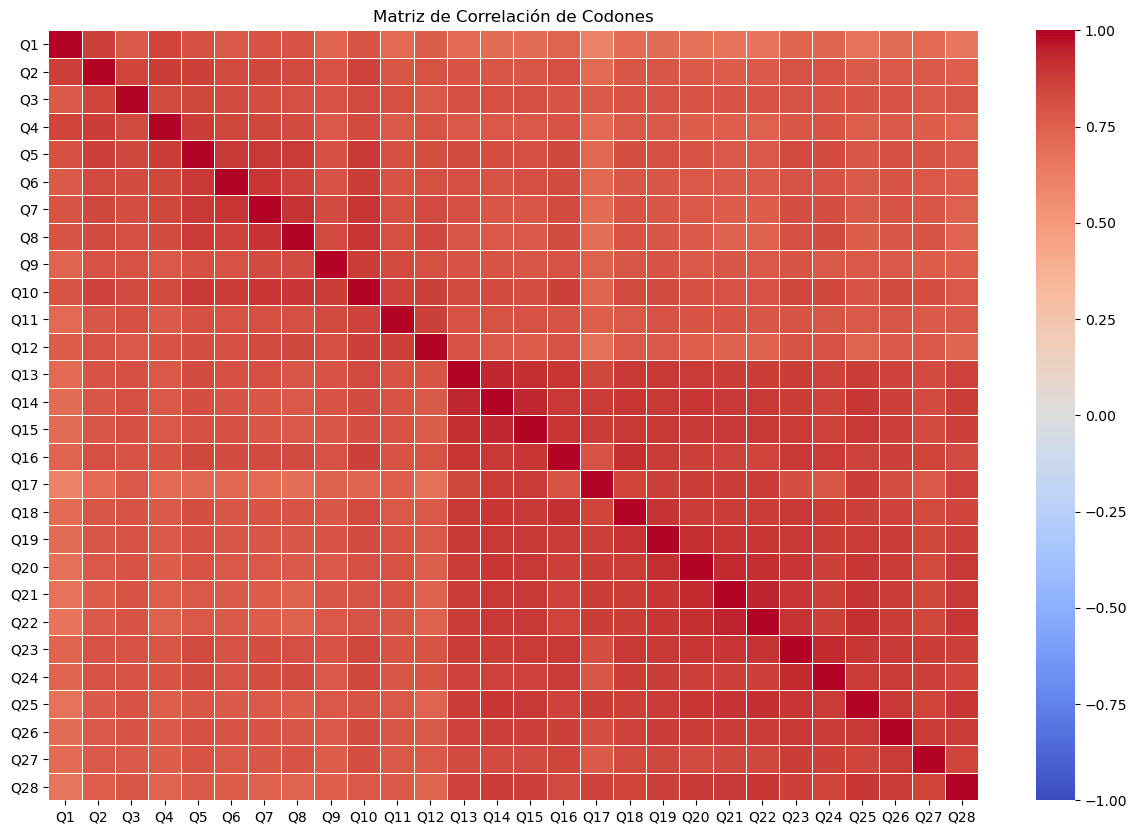

In [ ]:
# Crear el mapa de calor
plt.figure(figsize=(15, 10))
sns.heatmap(df.loc[:,'Q1':].corr(), annot=False, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Matriz de Correlación de Codones')
plt.show()